In [4]:
# import winshell
# import os

# def get_recycle_bin_files():
#     file_names = []
#     for path in winshell.recycle_bin():
#         file_names.append(os.path.basename(path.original_filename()))

#     return file_names

# deleted_files = get_recycle_bin_files()

# output_mask_dir = r'C:\THESIS_PROJECT\512_HOLDOUT\val\masks'

# deleted_files_count = 0

# for filename in os.listdir(output_mask_dir):
#     basename, _ = os.path.splitext(filename)
#     if basename in deleted_files:
#         file_path = os.path.join(output_mask_dir, filename)

#         os.remove(file_path)
#         deleted_files_count += 1

# # Print the total number of files deleted
# print(f"Files deleted: {deleted_files_count}")

Files deleted: 8


In [2]:
import os
import splitfolders

input_folder = r"C:\THESIS_PROJECT\DATA_PREPROCESS\512_PREPROCESS\512_DATASET\COMO_2019"
output_folder = r"C:\THESIS_PROJECT\TEST_DATASET\2019_test"
os.makedirs(output_folder, exist_ok=True)

splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.85, .15), group_prefix=None)

Copying files: 30382 files [19:55, 25.42 files/s]


## Augmentation Test

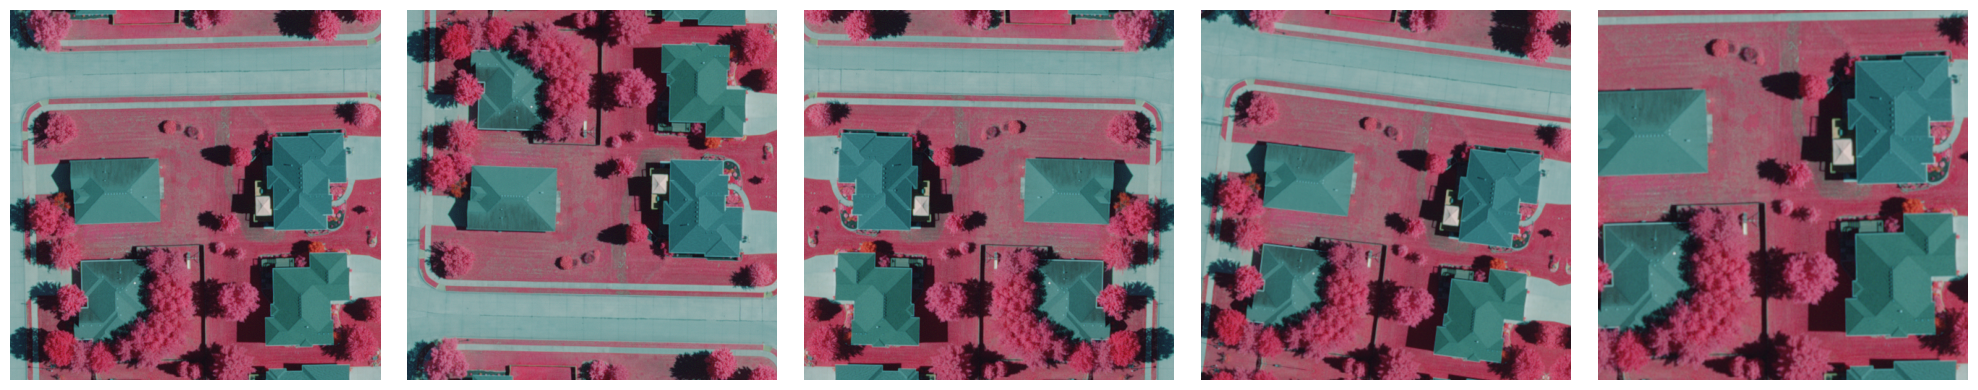

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import tifffile
import albumentations as A

def horizontal_flip():
    return A.Compose([A.HorizontalFlip(p=1)], p=1)

def vertical_flip():
    return A.Compose([A.VerticalFlip(p=1)], p=1)

def rotation():
    return A.Compose([A.Rotate(limit=(90, -90), p=1)], p=1)

def random_sized_crop():
    return A.Compose([A.RandomSizedCrop(min_max_height=(int(512 * 0.75), 512), 
                                        height=512, width=512, p=1)], p=1)

def apply_augmentation(image, augmentation):
    return augmentation(image=image)['image']

image_path = r"C:\THESIS_PROJECT\512_HOLDOUT\test\images\patch_3224.TIF"
original_image = tifffile.imread(image_path)

flipped_horizontally = apply_augmentation(original_image, horizontal_flip())
flipped_vertically = apply_augmentation(original_image, vertical_flip())
rotated = apply_augmentation(original_image, rotation())
random_cropped = apply_augmentation(original_image, random_sized_crop())

augmented_images = [flipped_vertically, flipped_horizontally, rotated, random_cropped]

plt.figure(figsize=(20, 4))
plt.subplot(1, 5, 1)
plt.imshow(original_image[:,:,[3,0,1]])
plt.axis('off')

for i, img in enumerate(augmented_images):
    plt.subplot(1, 5, i+2)
    plt.imshow(img[:,:,[3,0,1]])
    plt.axis('off')

plt.tight_layout()
plt.show()


## Reference sorting

In [2]:
from docx import Document
from collections import Counter

# pip install python-docx

# Load the Word document
doc_path = "D:\THESIS\References\REFERENCE_COMBINED.docx"
doc = Document(doc_path)

# Extract all text from the document and split into individual references
references = [para.text.strip() for para in doc.paragraphs if para.text.strip() != '']

# Count duplicates using the Counter from the collections module
reference_counts = Counter(references)

# print(reference_counts)

In [3]:
# Print out duplicates 
for ref, count in reference_counts.items():
    if count > 1:
        print(f"'{ref}' appears {count} times.")

'He, H., Yang, D., Wang, S., Wang, S., & Li, Y. (2019). Road Extraction by Using Atrous Spatial Pyramid Pooling Integrated Encoder-Decoder Network and Structural Similarity Loss. Remote Sensing, 11(9), 1015.' appears 2 times.
'Qiu, W., Gu, L., Gao, F., & Jiang, T. (2023). Building Extraction From Very High-Resolution Remote Sensing Images Using Refine-UNet. IEEE Geoscience and Remote Sensing Letters, 20, 1–5.' appears 2 times.
'Wang, H., & Miao, F. (2022). Building extraction from remote sensing images using deep residual U-Net. European Journal of Remote Sensing, 55(1), 71–85.' appears 2 times.
'Wang, L., Peng, J., & Sun, W. (2019). Spatial–Spectral Squeeze-and-Excitation Residual Network for Hyperspectral Image Classification. Remote Sensing, 11(7), 884.' appears 2 times.
'Zhang, X., Li, L., Di, D., Wang, J., Chen, G., Jing, W., & Emam, M. (2022). SERNet: Squeeze and Excitation Residual Network for Semantic Segmentation of High-Resolution Remote Sensing Images. Remote Sensing, 14(19)

In [4]:
# Extract unique references from the counter and sort them
# unique_references = sorted(reference_counts.keys())
unique_references = sorted(set(references))

In [5]:
# Print the processed references
print("Processed References:")
for ref in unique_references:
    print(ref)

Processed References:
Albelwi, S., & Mahmood, A. (2017). A Framework for Designing the Architectures of Deep Convolutional Neural Networks. Entropy, 19(6), 242.
Alhassan, V., Henry, C., Ramanna, S., & Storie, C. (2020). A deep learning framework for land-use/land-cover mapping and analysis using multispectral satellite imagery. Neural Computing and Applications, 32(12), 8529–8544.
Audebert, N., Le Saux, B., & Lefevre, S. (2019). Deep Learning for Classification of Hyperspectral Data: A Comparative Review. IEEE Geoscience and Remote Sensing Magazine, 7(2), 159–173.
Awais, M., Iqbal, M. T. B., & Bae, S. H. (2020). Revisiting internal covariate shift for batch normalization. IEEE Transactions on Neural Networks and Learning Systems, 32(11), 5082-5092.
Badrinarayanan, V., Kendall, A., & Cipolla, R. (2017). SegNet: A Deep Convolutional Encoder-Decoder Architecture for Image Segmentation. IEEE Transactions on Pattern Analysis and Machine Intelligence, 39(12), 2481–2495.
Basheer, I. A., & Haj

In [6]:
# Save the processed references back into a new Word document
processed_doc = Document()
for ref in unique_references:
    processed_doc.add_paragraph(ref)

# Save the updated document
processed_doc_path = 'D:\THESIS\References\Processed_REFERENCES.docx'
processed_doc.save(processed_doc_path)
print(f"Number of references: {len(unique_references)}")
print(f"Processed document saved to {processed_doc_path}")

Number of references: 103
Processed document saved to D:\THESIS\References\Processed_REFERENCES.docx
